<a href="https://colab.research.google.com/github/astrrr/test-classifier/blob/main/orange_grapefruit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
from keras.callbacks import History



In [22]:
img = image.load_img("/basedata/train/orange/0.jpg")

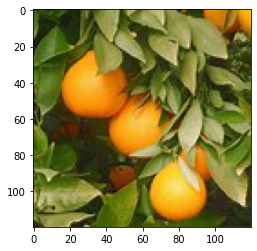

In [23]:
plt.imshow(img)

In [24]:
cv2.imread("/basedata/train/orange/0.jpg").shape

(120, 120, 3)

In [25]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [26]:
train_dataset = train.flow_from_directory("/basedata/train",
                                          target_size=(200,200),
                                          batch_size = 3,
                                          class_mode ="binary")

validation_dataset = validation.flow_from_directory("/basedata/validation",
                                          target_size=(200,200),
                                          batch_size = 3,
                                          class_mode ="binary")

Found 1416 images belonging to 2 classes.
Found 355 images belonging to 2 classes.


In [27]:
train_dataset.class_indices

{'grapefruit': 0, 'orange': 1}

In [28]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation= 'relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation= 'relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation= 'relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')

                                    ])

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [30]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch =3,
                      epochs = 1024,
                      validation_data = validation_dataset)


Epoch 1/1024
3/3 [==============================] - 1s 405ms/step - loss: 4.8974 - accuracy: 0.4444 - val_loss: 0.6476 - val_accuracy: 0.7380
Epoch 2/1024
3/3 [==============================] - 1s 359ms/step - loss: 0.8420 - accuracy: 0.4444 - val_loss: 0.6419 - val_accuracy: 0.7380
Epoch 3/1024
3/3 [==============================] - 1s 355ms/step - loss: 0.5808 - accuracy: 0.6667 - val_loss: 1.9425 - val_accuracy: 0.2620
Epoch 4/1024
3/3 [==============================] - 1s 348ms/step - loss: 0.6574 - accuracy: 0.5556 - val_loss: 0.8341 - val_accuracy: 0.3324
Epoch 5/1024
3/3 [==============================] - 1s 353ms/step - loss: 0.7837 - accuracy: 0.1111 - val_loss: 0.6331 - val_accuracy: 0.7296
Epoch 6/1024
3/3 [==============================] - 1s 356ms/step - loss: 0.6990 - accuracy: 0.5556 - val_loss: 0.7051 - val_accuracy: 0.4113
Epoch 7/1024
3/3 [==============================] - 1s 353ms/step - loss: 0.7500 - accuracy: 0.3333 - val_loss: 0.6926 - val_accuracy: 0.5606
Epoch 

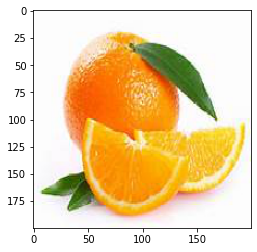

This is Orange : 802.jpg
************************************************


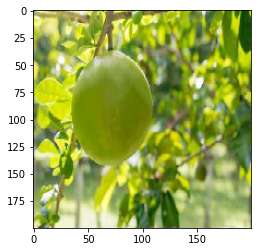

This is Grapefruit : 982.jpg
************************************************


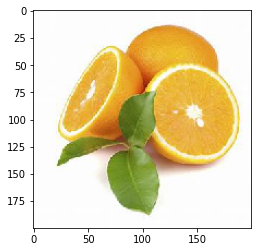

This is Orange : 808.jpg
************************************************


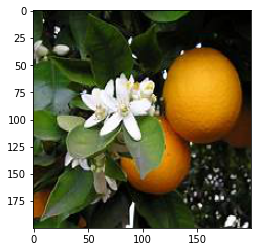

This is Orange : 810.jpg
************************************************


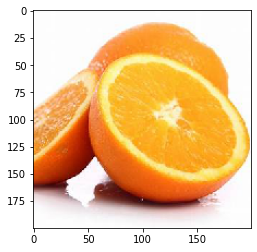

This is Orange : 807.jpg
************************************************


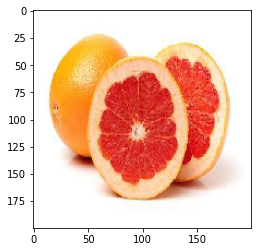

This is Grapefruit : 1007.jpg
************************************************


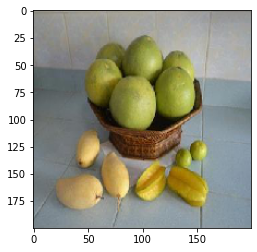

This is Orange : 977.jpg
************************************************


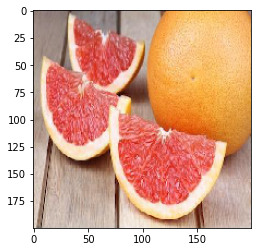

This is Grapefruit : 1008.jpg
************************************************


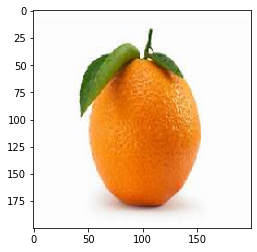

This is Orange : 816.jpg
************************************************


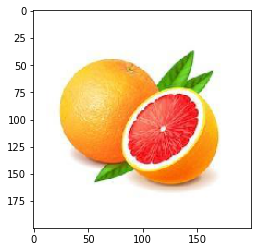

This is Grapefruit : 1003.jpg
************************************************


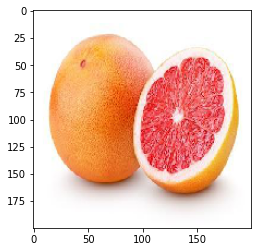

This is Grapefruit : 1010.jpg
************************************************


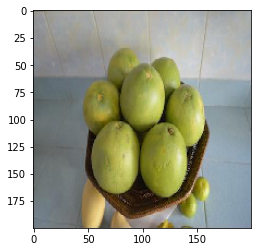

This is Grapefruit : 979.jpg
************************************************


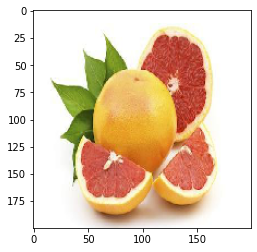

This is Grapefruit : 1011.jpg
************************************************


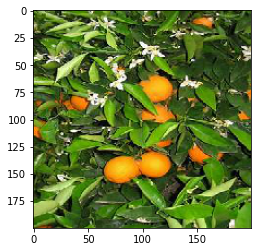

This is Orange : 814.jpg
************************************************


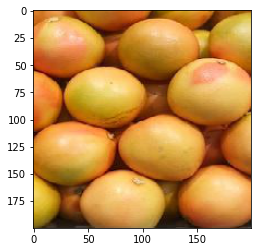

This is Orange : 973.jpg
************************************************


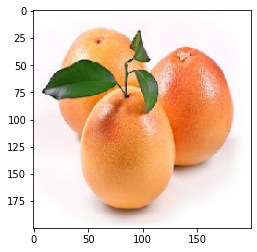

This is Orange : 1002.jpg
************************************************


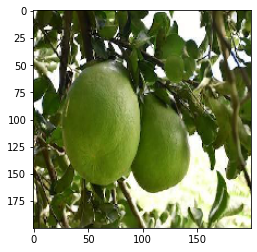

This is Grapefruit : 993.jpg
************************************************


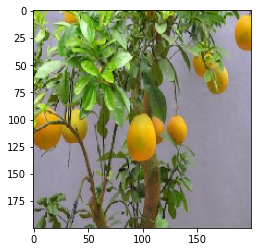

This is Orange : 988.jpg
************************************************


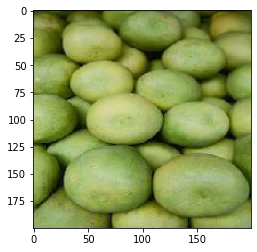

This is Grapefruit : 986.jpg
************************************************


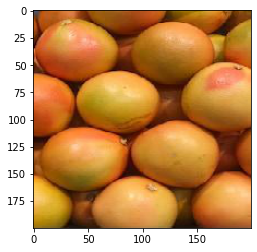

This is Orange : 971.jpg
************************************************


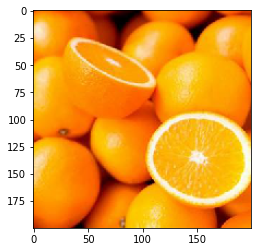

This is Orange : 803.jpg
************************************************


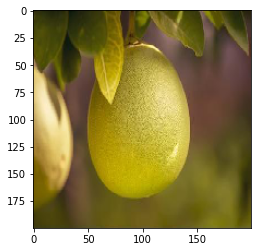

This is Orange : 996.jpg
************************************************


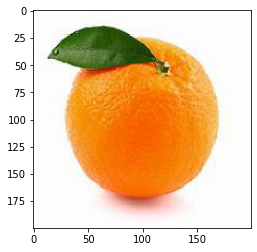

This is Orange : 818.jpg
************************************************


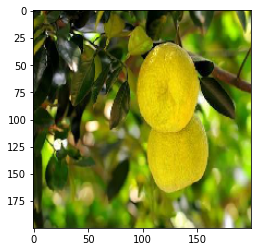

This is Grapefruit : 981.jpg
************************************************


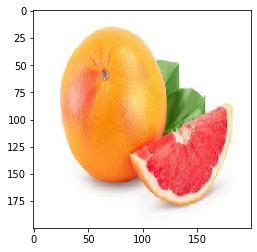

This is Grapefruit : 1009.jpg
************************************************


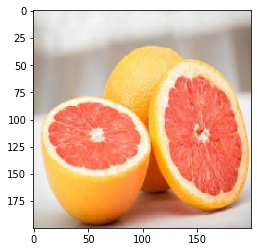

This is Grapefruit : 1005.jpg
************************************************


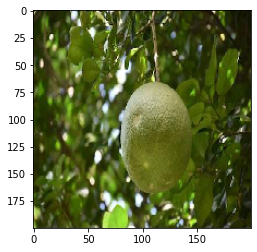

This is Grapefruit : 992.jpg
************************************************


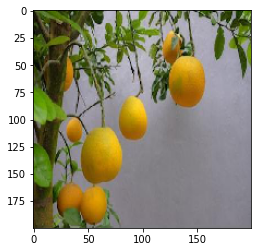

This is Orange : 987.jpg
************************************************


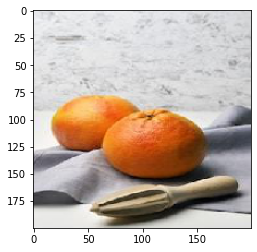

This is Orange : 998.jpg
************************************************


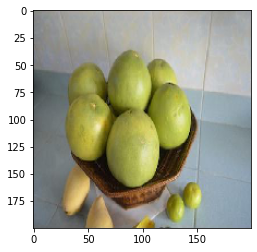

This is Orange : 978.jpg
************************************************


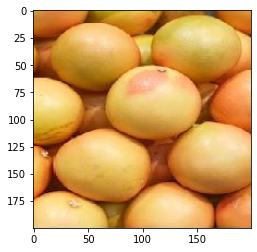

This is Orange : 974.jpg
************************************************


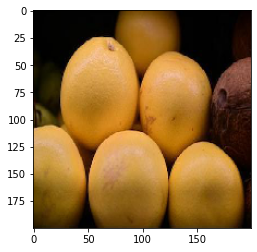

This is Orange : 997.jpg
************************************************


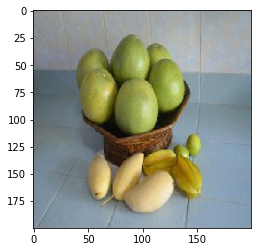

This is Orange : 980.jpg
************************************************


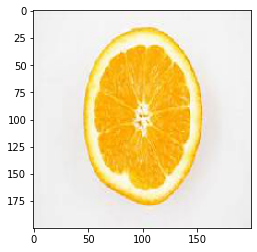

This is Orange : 806.jpg
************************************************


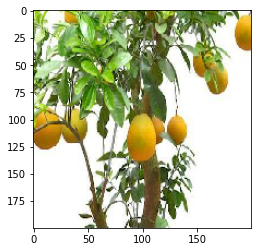

This is Orange : 989.jpg
************************************************


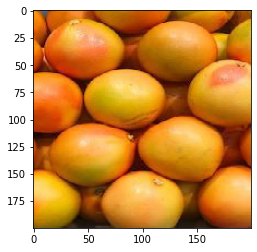

This is Orange : 976.jpg
************************************************


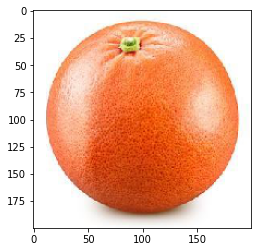

This is Orange : 991.jpg
************************************************


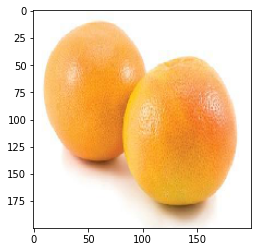

This is Orange : 1000.jpg
************************************************


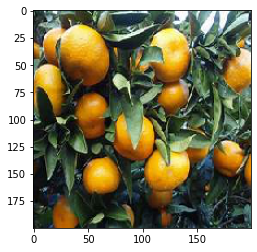

This is Orange : 820.jpg
************************************************


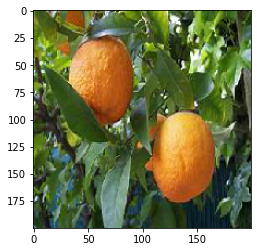

This is Orange : 809.jpg
************************************************


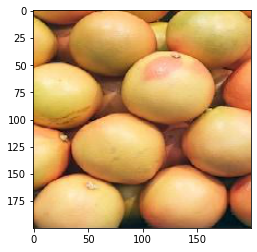

This is Orange : 975.jpg
************************************************


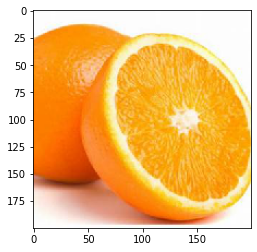

This is Orange : 801.jpg
************************************************


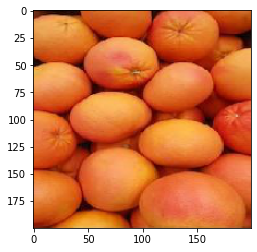

This is Orange : 994.jpg
************************************************


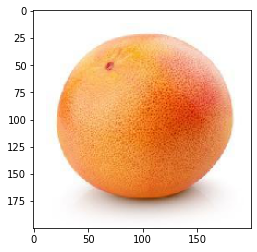

This is Orange : 1001.jpg
************************************************


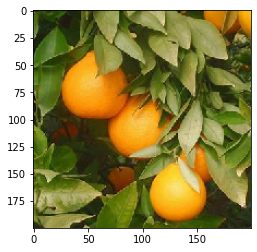

This is Orange : 804.jpg
************************************************


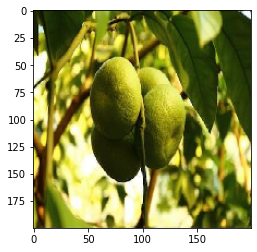

This is Grapefruit : 970.jpg
************************************************


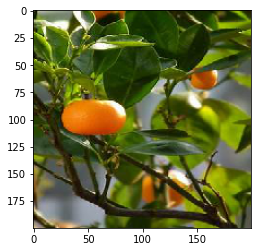

This is Orange : 813.jpg
************************************************


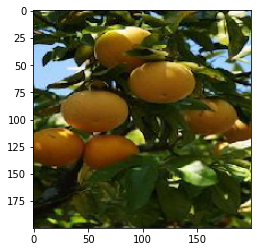

This is Orange : 985.jpg
************************************************


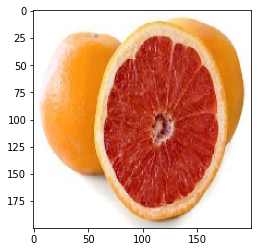

This is Grapefruit : 1006.jpg
************************************************


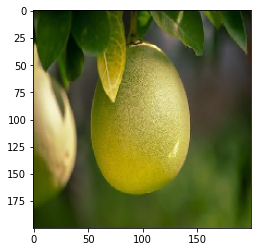

This is Grapefruit : 995.jpg
************************************************


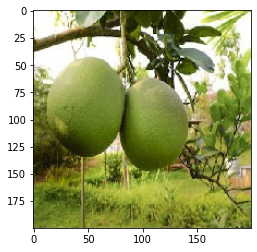

This is Grapefruit : 984.jpg
************************************************


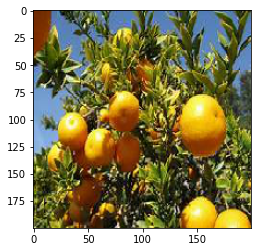

This is Orange : 811.jpg
************************************************


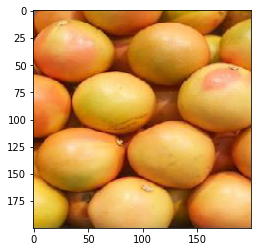

This is Orange : 972.jpg
************************************************


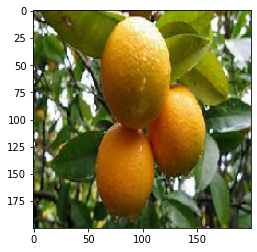

This is Orange : 817.jpg
************************************************


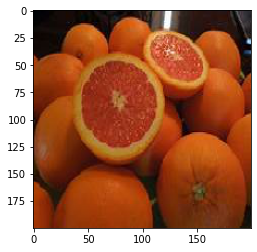

This is Orange : 805.jpg
************************************************


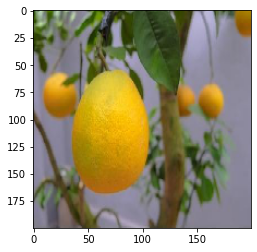

This is Orange : 990.jpg
************************************************


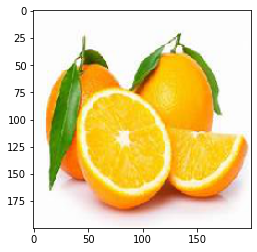

This is Orange : 812.jpg
************************************************


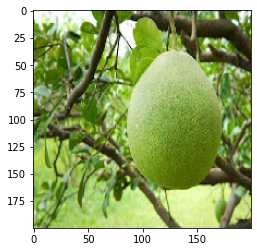

This is Grapefruit : 983.jpg
************************************************


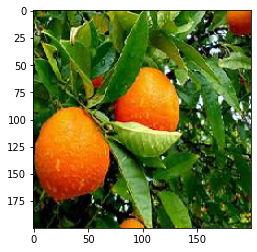

This is Orange : 819.jpg
************************************************


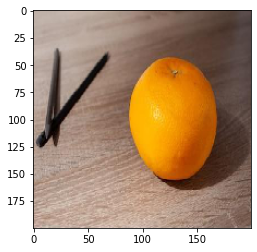

This is Orange : 999.jpg
************************************************


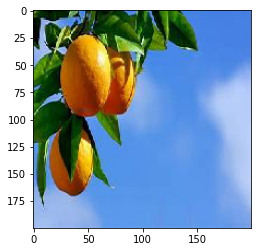

This is Orange : 815.jpg
************************************************


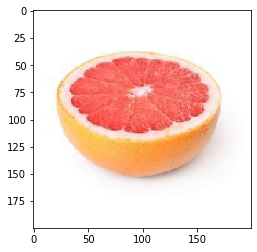

This is Grapefruit : 1004.jpg
************************************************


In [31]:
dir_path = '/basedata/test'
for i in os.listdir(dir_path):
    img = tf.keras.preprocessing.image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X= tf.keras.preprocessing.image.img_to_array(img)
    X= np.expand_dims(X,axis=0)
    image = np.vstack([X])
    val = model.predict(image)

    #print(val)

    if val ==0:
      print('This is Grapefruit : '+i)
      print('************************************************')
    else:
      print('This is Orange : '+i)
      print('************************************************')
    




*   `801-820`.jpg = **Orange**
*   `970-1011`.jpg = **Grapefruit**



In [32]:
print(model_fit.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


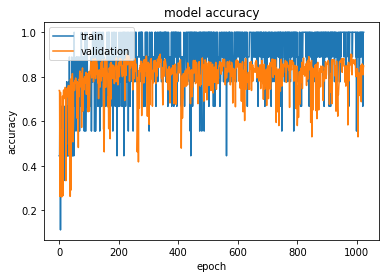

In [33]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

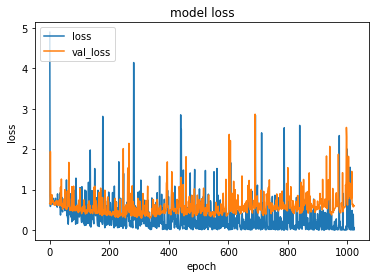

In [34]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

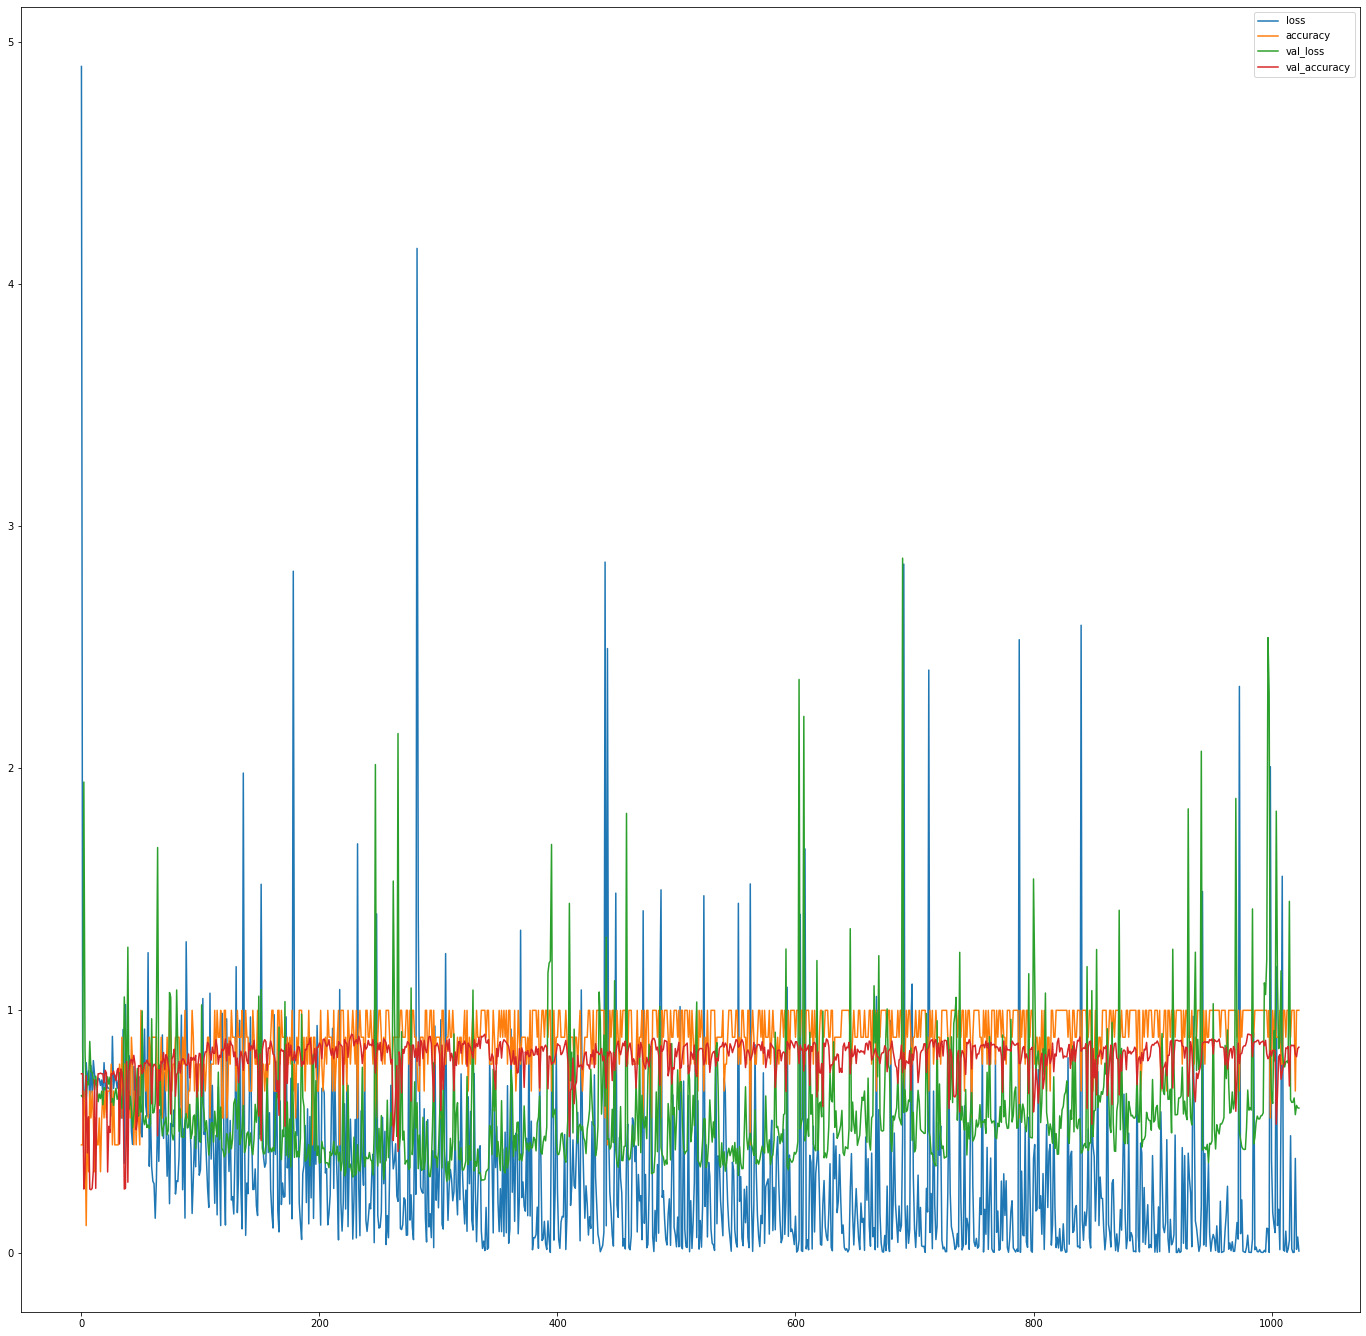

In [35]:
pd.DataFrame(model_fit.history).plot(figsize=(24,24))
plt.show()